In [502]:
# Importing all libraries
import pandas as pd
import numpy  as np 
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [419]:
# Loading the dataset in dataframe using python
df = pd.read_csv("Absenteeism_at_work.csv")

In [420]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"2,39,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"2,39,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"2,39,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"2,39,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"2,39,554",...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,"2,64,604",...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,"2,64,604",...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,"2,71,219",...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,"2,71,219",...,0,1,2,1,0,2,100,170,35,0


In [421]:
#dimensions of the data
df.shape

(740, 21)

In [422]:
# dataframe columns
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [423]:
# Data Types of all the variables
df.dtypes

ID                                  int64
Reason for absence                  int64
Month of absence                    int64
Day of the week                     int64
Seasons                             int64
Transportation expense              int64
Distance from Residence to Work     int64
Service time                        int64
Age                                 int64
Work load Average/day              object
Hit target                          int64
Disciplinary failure                int64
Education                           int64
Son                                 int64
Social drinker                      int64
Social smoker                       int64
Pet                                 int64
Weight                              int64
Height                              int64
Body mass index                     int64
Absenteeism time in hours           int64
dtype: object

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    int64 
 1   Reason for absence               740 non-null    int64 
 2   Month of absence                 740 non-null    int64 
 3   Day of the week                  740 non-null    int64 
 4   Seasons                          740 non-null    int64 
 5   Transportation expense           740 non-null    int64 
 6   Distance from Residence to Work  740 non-null    int64 
 7   Service time                     740 non-null    int64 
 8   Age                              740 non-null    int64 
 9   Work load Average/day            740 non-null    object
 10  Hit target                       740 non-null    int64 
 11  Disciplinary failure             740 non-null    int64 
 12  Education                        740

In [425]:
# Number of Unique values present in each variable
df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [426]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

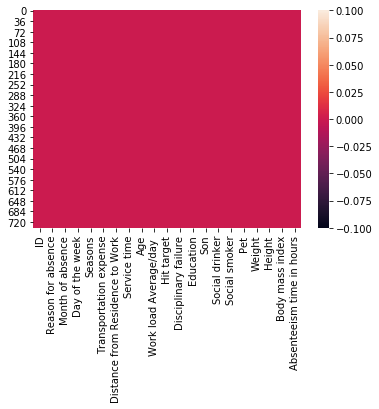

In [427]:
sns.heatmap(df.isnull())

In [428]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [429]:
df["Work load Average/day "].value_counts()

2,22,196    36
2,64,249    33
2,37,656    32
3,43,253    29
2,65,017    28
2,84,853    25
3,08,593    24
2,68,519    23
2,44,387    22
2,41,476    22
2,84,031    22
2,51,818    21
2,05,917    21
2,30,290    20
3,26,452    20
2,46,288    20
2,53,957    19
2,94,217    19
2,36,629    19
2,75,089    19
2,39,554    19
3,02,585    18
3,06,345    18
2,53,465    18
2,65,615    18
2,46,074    16
3,78,884    16
2,75,312    16
3,77,550    16
2,49,797    15
2,61,306    15
2,80,549    15
3,13,532    15
2,39,409    13
2,61,756    12
2,64,604    12
3,30,061    11
2,71,219     3
Name: Work load Average/day , dtype: int64

In [430]:
df["Work load Average/day "].unique()

array(['2,39,554', '2,05,917', '2,41,476', '2,53,465', '3,06,345',
       '2,61,306', '3,08,593', '3,02,585', '3,43,253', '3,26,452',
       '3,78,884', '3,77,550', '2,75,312', '2,65,615', '2,94,217',
       '2,65,017', '2,84,031', '2,36,629', '3,30,061', '2,51,818',
       '2,44,387', '2,39,409', '2,46,074', '2,53,957', '2,30,290',
       '2,49,797', '2,61,756', '2,84,853', '2,68,519', '2,80,549',
       '3,13,532', '2,64,249', '2,22,196', '2,46,288', '2,37,656',
       '2,75,089', '2,64,604', '2,71,219'], dtype=object)

In [431]:
# removing here commas(',') from "Work load Average/day " column
df["Work load Average/day "]=df["Work load Average/day "].str.replace(',','')

In [432]:
df["Work load Average/day "].unique()

array(['239554', '205917', '241476', '253465', '306345', '261306',
       '308593', '302585', '343253', '326452', '378884', '377550',
       '275312', '265615', '294217', '265017', '284031', '236629',
       '330061', '251818', '244387', '239409', '246074', '253957',
       '230290', '249797', '261756', '284853', '268519', '280549',
       '313532', '264249', '222196', '246288', '237656', '275089',
       '264604', '271219'], dtype=object)

In [433]:
df["Work load Average/day "]=df["Work load Average/day "].astype("float")

In [434]:
df["Work load Average/day "].dtype

dtype('float64')

In [435]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [436]:
# categorising the variables 
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

# Exploratory Data analysis

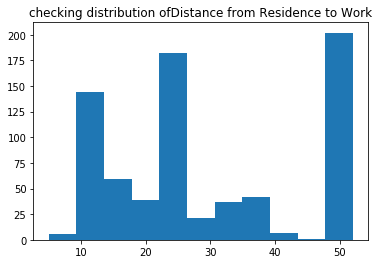

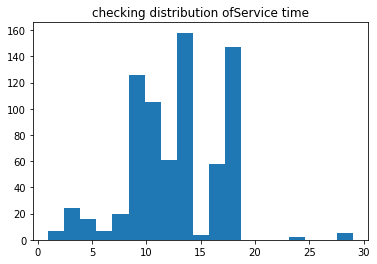

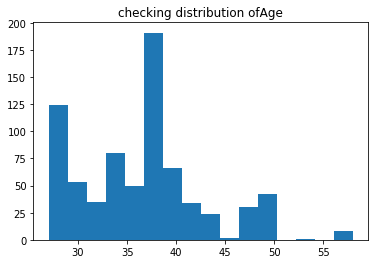

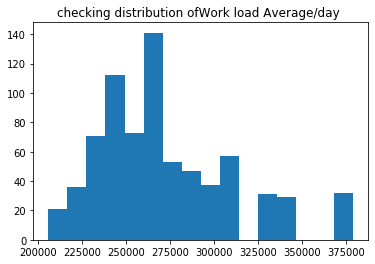

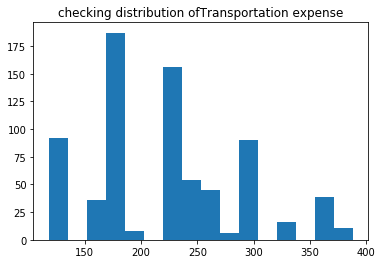

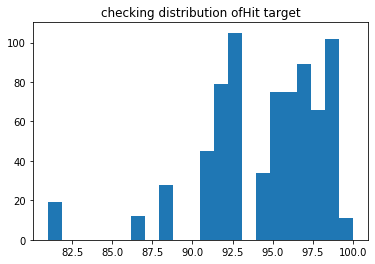

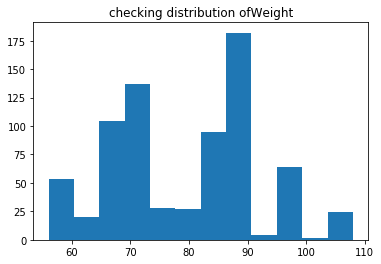

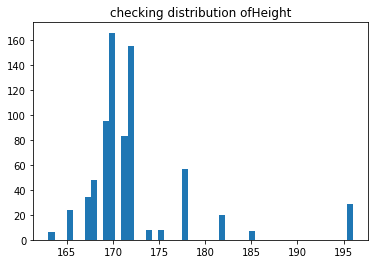

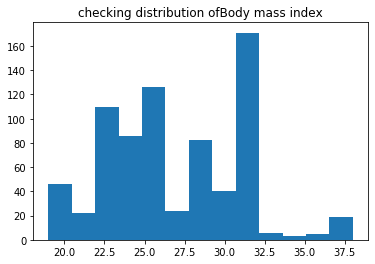

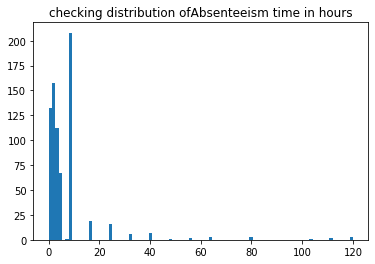

In [437]:
for i in continuous_vars:
    plt.hist(df[i],bins='auto')
    plt.title('checking distribution of' + str(i))
    plt.show()

In [438]:
df['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

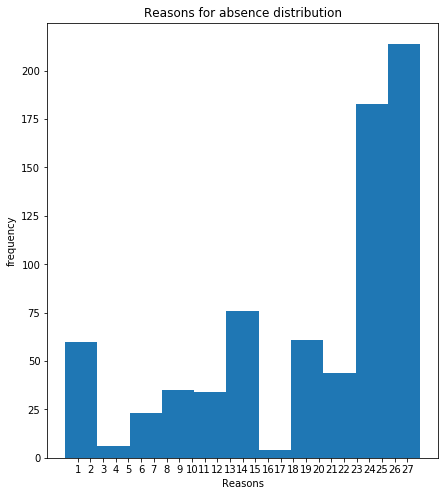

In [439]:
# checking reasons for absenteeism
plt.figure(figsize=(7,8))
plt.hist(df['Reason for absence'],bins='auto')
plt.xticks(range(1,28))
plt.xlabel("Reasons")
plt.ylabel("frequency")
plt.title('Reasons for absence distribution')
plt.show()

could see people with dental consultation and physiotherapy tend to be absent more often.


In [440]:
df['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

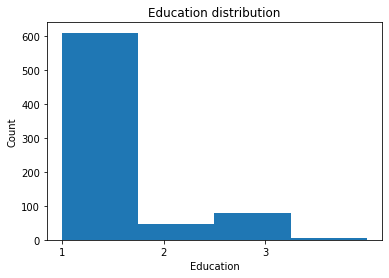

In [441]:
#checking education variable
plt.hist(df['Education'],bins=4)
plt.xticks(range(1,4))
plt.xlabel("Education")
plt.ylabel("Count")
plt.title('Education distribution')
plt.show()

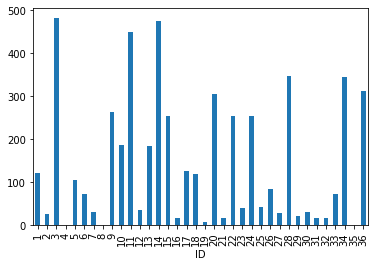

In [442]:
## grouping the data using ID and plotting bar plot

df.groupby('ID').sum()['Absenteeism time in hours'].plot.bar()

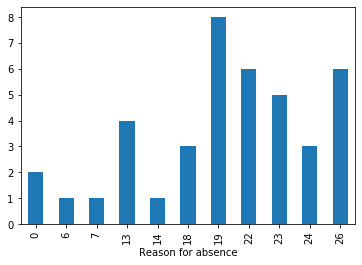

In [443]:
#checking what are reasons for absence of highest absentee (ID=11)
df.iloc[np.where(df['ID']==11)].groupby('Reason for absence').count()['ID'].plot.bar()

In [444]:
## grouping the data using Reason for absence and plotting bar plot

Text(0, 0.5, 'Absenteeism time in hours')

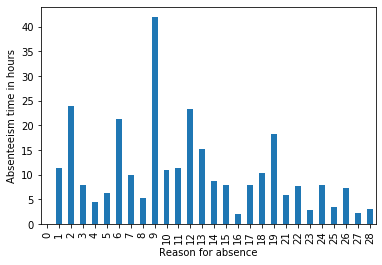

In [445]:
df.groupby('Reason for absence').mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism time in hours')

Text(0, 0.5, 'Absenteeism time in hours')

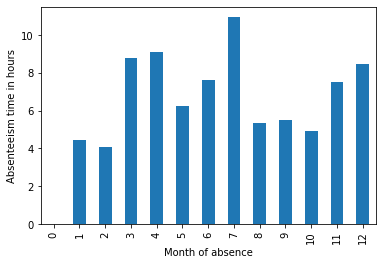

In [446]:
df.groupby('Month of absence').mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism time in hours')

Text(0, 0.5, 'Absenteeism time in hours')

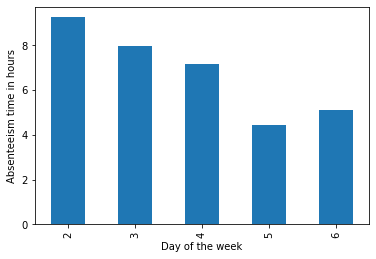

In [447]:
df.groupby('Day of the week').mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism time in hours')

Text(0, 0.5, 'Absenteeism time in hours')

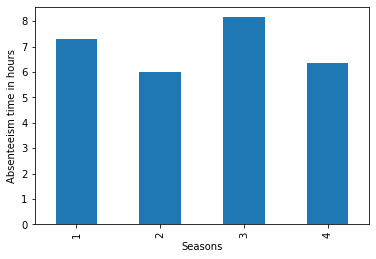

In [448]:
df.groupby('Seasons').mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism time in hours')

Text(0, 0.5, 'Absenteeism time in hours')

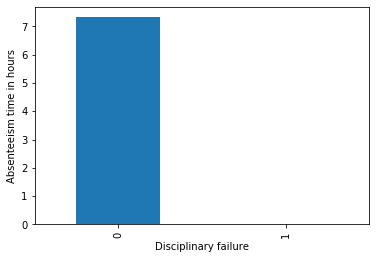

In [449]:
df.groupby([categorical_vars[5]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism time in hours')

Text(0, 0.5, 'Absenteeism time in hours')

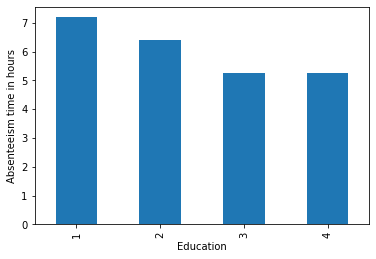

In [450]:
df.groupby([categorical_vars[6]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism time in hours')

Text(0, 0.5, 'Absenteeism time in hours')

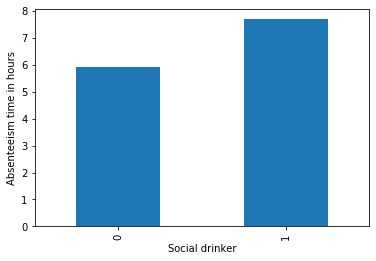

In [451]:
df.groupby([categorical_vars[7]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism time in hours')

Text(0, 0.5, 'Absenteeism time in hours')

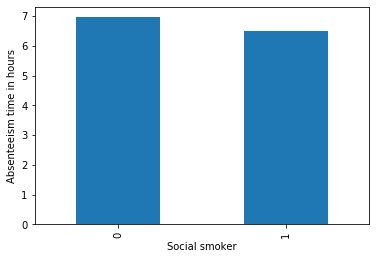

In [452]:
df.groupby([categorical_vars[8]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism time in hours')

Text(0, 0.5, 'Absenteeism time in hours')

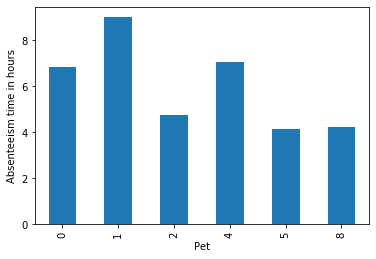

In [453]:
df.groupby([categorical_vars[9]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism time in hours')

Text(0, 0.5, 'Absenteeism time in hours')

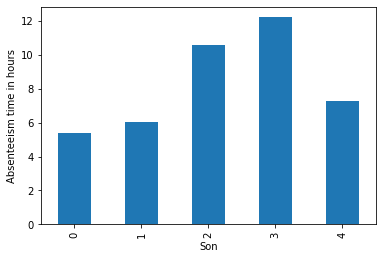

In [454]:
df.groupby([categorical_vars[10]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism time in hours')

Text(0, 0.5, 'Work load Average/day ')

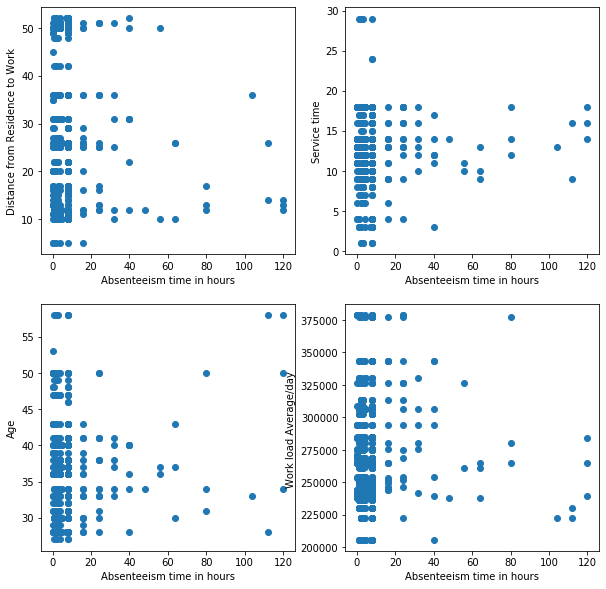

In [455]:
## plotting scatter plot for target variable vs each continuous variable
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
axis[0,0].scatter(df['Absenteeism time in hours'],df[continuous_vars[0]])
axis[0,0].set_xlabel('Absenteeism time in hours')
axis[0,0].set_ylabel(continuous_vars[0])
axis[0,1].scatter(df['Absenteeism time in hours'],df[continuous_vars[1]])
axis[0,1].set_xlabel('Absenteeism time in hours')
axis[0,1].set_ylabel(continuous_vars[1])
axis[1,0].scatter(df['Absenteeism time in hours'],df[continuous_vars[2]])
axis[1,0].set_xlabel('Absenteeism time in hours')
axis[1,0].set_ylabel(continuous_vars[2])
axis[1,1].scatter(df['Absenteeism time in hours'],df[continuous_vars[3]])
axis[1,1].set_xlabel('Absenteeism time in hours')
axis[1,1].set_ylabel(continuous_vars[3])

Text(0, 0.5, 'Height')

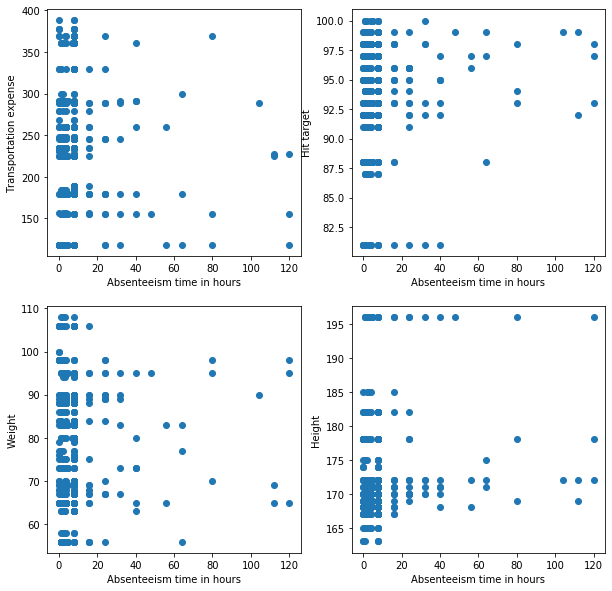

In [456]:
## plotting scatter plot for target variable vs each continuous variable
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
axis[0,0].scatter(df['Absenteeism time in hours'],df[continuous_vars[4]])
axis[0,0].set_xlabel('Absenteeism time in hours')
axis[0,0].set_ylabel(continuous_vars[4])
axis[0,1].scatter(df['Absenteeism time in hours'],df[continuous_vars[5]])
axis[0,1].set_xlabel('Absenteeism time in hours')
axis[0,1].set_ylabel(continuous_vars[5])
axis[1,0].scatter(df['Absenteeism time in hours'],df[continuous_vars[6]])
axis[1,0].set_xlabel('Absenteeism time in hours')
axis[1,0].set_ylabel(continuous_vars[6])
axis[1,1].scatter(df['Absenteeism time in hours'],df[continuous_vars[7]])
axis[1,1].set_xlabel('Absenteeism time in hours')
axis[1,1].set_ylabel(continuous_vars[7])

# Outlier analysis

Text(0, 0.5, 'Values')

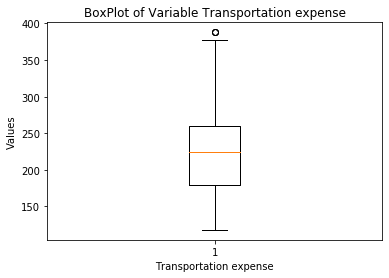

In [457]:
# Ploting BoxPlot of continuous variables
plt.boxplot(df['Transportation expense'])
plt.xlabel('Transportation expense')
plt.title("BoxPlot of Variable Transportation expense")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

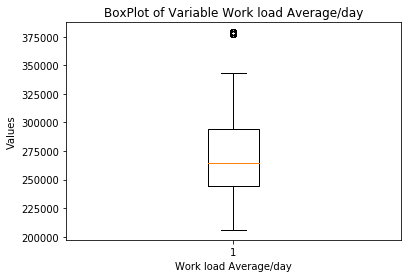

In [458]:
# Ploting BoxPlot of continuous variables
plt.boxplot(df['Work load Average/day '])
plt.xlabel("Work load Average/day")
plt.title("BoxPlot of Variable Work load Average/day")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

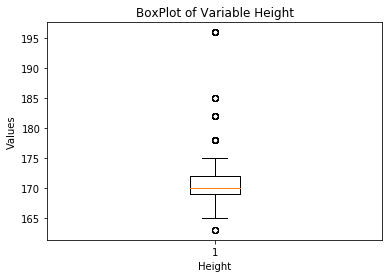

In [459]:
# Ploting BoxPlot of continuous variables
plt.boxplot(df['Height'])
plt.xlabel("Height")
plt.title("BoxPlot of Variable Height")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

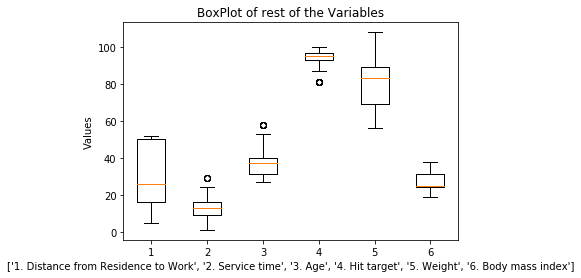

In [460]:
plt.boxplot([ df['Distance from Residence to Work'], df['Service time'], df['Age'], df['Hit target'], df['Weight'], df['Body mass index']])
plt.xlabel(['1. Distance from Residence to Work', '2. Service time', '3. Age', '4. Hit target', '5. Weight', '6. Body mass index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')

From the above boxplot we can clearly see that in variables 'Distance from Residence to Work', 'Weight' and 'Body mass index'
there is no outlier

In [461]:
# list of variables which doesn't have outlier
neglect = ['Distance from Residence to Work', 'Weight', 'Body mass index']

# Looping over all continuou variables to detect and remove Outliers
for i in continuous_vars:
    # Avoiding the variables which doesn't have outlier
    if i in neglect:
        continue
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan

In [462]:
# Replacing null values with mean  
for i in continuous_vars:
    df[i].fillna(df[i].mean(),inplace=True)

# Feature selection

In [464]:
dfcor = df.corr()

dfcor

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.239155,-0.486160,-0.320878,0.075394,0.109769,...,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,-0.079169,-0.306924,-0.135737
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.102375,0.161831,0.061811,-0.059257,-0.081730,...,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.025478,0.037205,-0.106437
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.149238,-0.003887,-0.074520,0.004869,-0.172324,...,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.021078,0.051046,-0.002982
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.041040,0.118026,0.016961,0.022915,0.043537,...,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.054044,-0.103578,-0.067632
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.039424,-0.063108,-0.022472,0.006124,0.139620,...,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.042936,-0.011031,-0.071381
Transportation expense,-0.239155,-0.102375,0.149238,0.041040,0.039424,1.000000,0.275694,-0.391719,-0.273079,-0.029122,...,0.097943,-0.051318,0.397465,0.158752,0.047809,0.411047,-0.207684,-0.009503,-0.131854,0.193068
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.275694,1.000000,0.105270,-0.114704,-0.084679,...,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.075057,0.113772,0.009341
Service time,-0.320878,0.061811,-0.074520,0.016961,-0.022472,-0.391719,0.105270,1.000000,0.664027,-0.064694,...,0.006186,-0.212353,-0.024640,0.402143,0.083699,-0.488605,0.419121,-0.071502,0.467079,-0.082552
Age,0.075394,-0.059257,0.004869,0.022915,0.006124,-0.273079,-0.114704,0.664027,1.000000,-0.063900,...,0.120532,-0.219838,0.026105,0.271846,0.140740,-0.254122,0.488942,-0.113443,0.544439,-0.101224
Work load Average/day,0.109769,-0.081730,-0.172324,0.043537,0.139620,-0.029122,-0.084679,-0.064694,-0.063900,1.000000,...,-0.012484,-0.047351,0.053949,-0.087727,0.025818,0.001113,-0.091196,-0.058101,-0.117335,0.045686


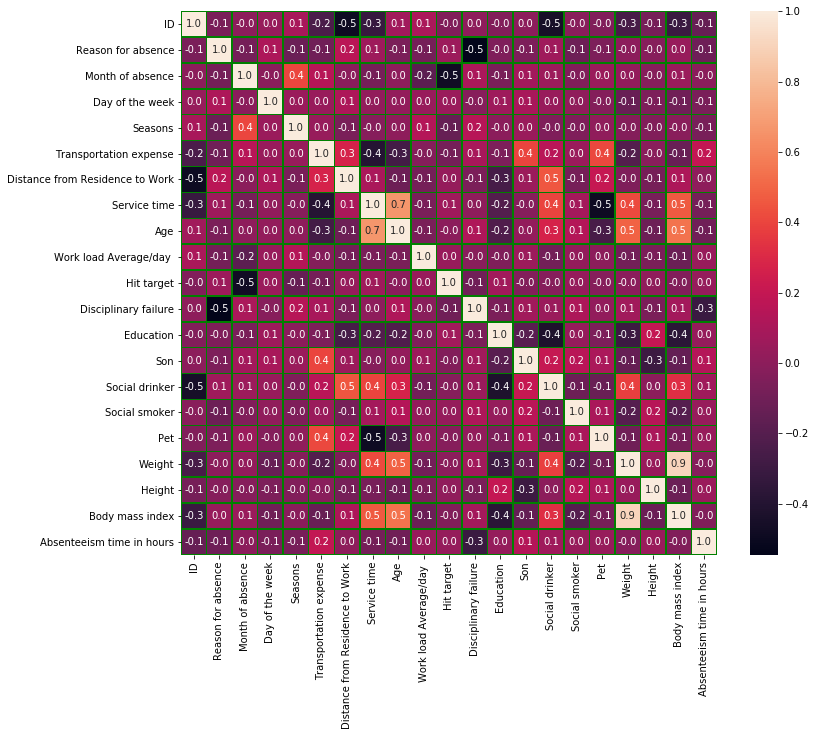

In [465]:
# Checking correlation using heatmap
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(dfcor,annot=True,linewidth=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()

In [466]:
# Droping the variables which has redundant information
to_drop = ['Weight']
df = df.drop(to_drop, axis = 1)

In [467]:
# Updating the Continuous Variables and Categorical Variables after droping some variables
continuous_vars = [i for i in continuous_vars if i not in to_drop]
categorical_vars = [i for i in categorical_vars if i not in to_drop]

# Feature scaling

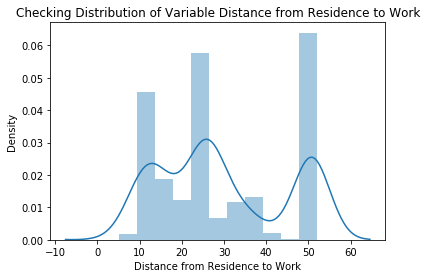

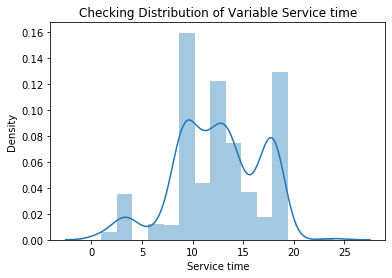

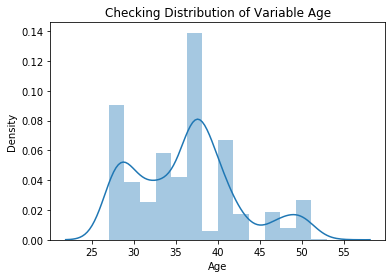

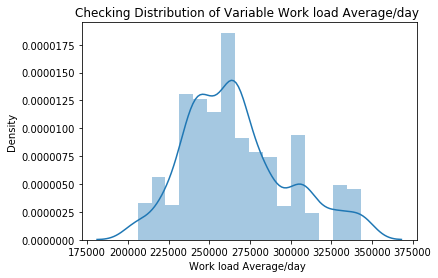

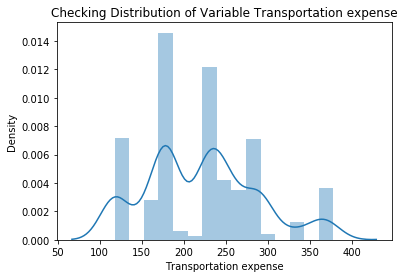

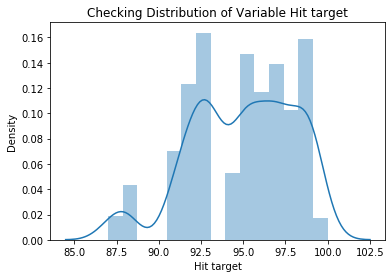

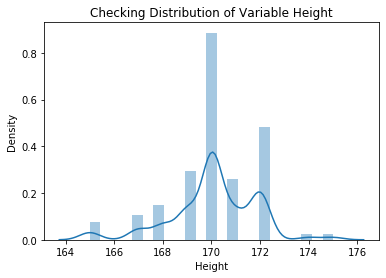

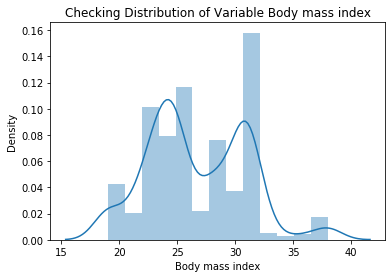

In [468]:
# Checking if there is any normally distributed variable in data
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(df[i],bins='auto')
    plt.title("Checking Distribution of Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [469]:
# Since there is no normally distributed curve we will use Normalizationg for Feature Scalling
# #Normalization
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

In [470]:
# Get dummy variables for categorical variables
df = pd.get_dummies(data = df, columns = categorical_vars)

# Copying dataframe
df1 = df.copy()

In [471]:
df

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,Absenteeism time in hours,ID_1,...,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8,Son_0,Son_1,Son_2,Son_3,Son_4
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.700000,0.578947,4.0,0,...,1,0,0,0,0,0,0,1,0,0
1,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,0.508374,0.631579,0.0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.500000,0.631579,2.0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.300000,0.263158,4.0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.700000,0.578947,2.0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.657692,0.659574,0.521739,0.230769,0.427324,0.461538,0.700000,0.578947,8.0,0,...,1,0,0,0,0,0,0,1,0,0
736,0.450000,0.127660,0.565217,0.384615,0.427324,0.461538,0.700000,0.526316,4.0,1,...,1,0,0,0,0,0,1,0,0,0
737,0.000000,0.191489,0.521739,0.500000,0.475491,0.615385,0.500000,0.789474,0.0,0,...,0,0,0,0,1,0,1,0,0,0
738,0.434615,0.638298,0.565217,0.461538,0.475491,0.615385,0.500000,0.842105,0.0,0,...,0,1,0,0,0,0,0,1,0,0


In [480]:
y=df.iloc[:,8]
x=df.iloc[:, df.columns != 'Absenteeism time in hours']

In [481]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [485]:
#Decision tree

# Building model on top of training dataset
DT = DecisionTreeRegressor(max_depth = 2)
DT.fit(x_train,y_train)
# Calculating RMSE for training data to check for over fitting
pred_train = DT.predict(x_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
y_pred = DT.predict(x_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,y_pred)))

Root Mean Squared Error For Training data = 3.025333378792373
Root Mean Squared Error For Test data = 3.2862527927688268
R^2 Score(coefficient of determination) = 0.03597832881747576


In [487]:
#Random forest

# Building model on top of training dataset
RF = RandomForestRegressor(n_estimators = 500)
RF.fit(x_train,y_train)
# Calculating RMSE for training data to check for over fitting
pred_train = RF.predict(x_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
y_pred = RF.predict(x_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,y_pred)))

Root Mean Squared Error For Training data = 1.0352747281709127
Root Mean Squared Error For Test data = 2.7774456652471184
R^2 Score(coefficient of determination) = 0.3113857527964522


In [488]:
#Linear Regression

# Building model on top of training dataset
lr = LinearRegression()
lr.fit(x_train,y_train)
# Calculating RMSE for training data to check for over fitting
pred_train = lr.predict(x_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
y_pred = lr.predict(x_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,y_pred)))

Root Mean Squared Error For Training data = 2.2919220594730714
Root Mean Squared Error For Test data = 724098628755.3936
R^2 Score(coefficient of determination) = -4.6803713329417024e+22


In [491]:
#GradientBoostingRegressor

# Building model on top of training dataset
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
# Calculating RMSE for training data to check for over fitting
pred_train = gbr.predict(x_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
y_pred = gbr.predict(x_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,y_pred)))

Root Mean Squared Error For Training data = 2.0842183522299496
Root Mean Squared Error For Test data = 2.7264418426079358
R^2 Score(coefficient of determination) = 0.3364443719881306


# Dimensionality Reduction using PCA

In [492]:
target = df['Absenteeism time in hours']

In [493]:
df.drop(['Absenteeism time in hours'], inplace = True, axis=1)
df.shape

(740, 115)

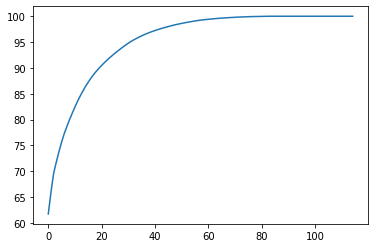

In [494]:
from sklearn.decomposition import PCA

# Converting data to numpy array
x = df1.values

# Data has 129 variables so no of components of PCA = 115
pca = PCA(n_components=115)
pca.fit(x)

# The amount of variance that each PC explains
var= pca.explained_variance_ratio_

# Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.show()

In [496]:
# From the above plot selecting 45 components since it explains almost 95+ % data variance
pca = PCA(n_components=45)

# Fitting the selected components to the data
pca.fit(x)

# Using train_test_split sampling function for test and train data split
x_train, x_test, y_train, y_test = train_test_split(x,target, test_size=0.2)

In [497]:
#Decision tree

# Building model on top of training dataset
DT = DecisionTreeRegressor(max_depth = 2)
DT.fit(x_train,y_train)
# Calculating RMSE for training data to check for over fitting
pred_train = DT.predict(x_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
y_pred = DT.predict(x_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,y_pred)))

Root Mean Squared Error For Training data = 0.5709716023625024
Root Mean Squared Error For Test data = 0.5790234738231422
R^2 Score(coefficient of determination) = 0.9674094225596623


In [498]:
#Random forest

# Building model on top of training dataset
RF = RandomForestRegressor(n_estimators = 500)
RF.fit(x_train,y_train)
# Calculating RMSE for training data to check for over fitting
pred_train = RF.predict(x_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
y_pred = RF.predict(x_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,y_pred)))

Root Mean Squared Error For Training data = 0.01599503152351733
Root Mean Squared Error For Test data = 0.04210989483771294
R^2 Score(coefficient of determination) = 0.9998276274811367


In [499]:
#Random forest

# Building model on top of training dataset
RF = RandomForestRegressor(n_estimators = 500)
RF.fit(x_train,y_train)
# Calculating RMSE for training data to check for over fitting
pred_train = RF.predict(x_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
y_pred = RF.predict(x_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,y_pred)))

Root Mean Squared Error For Training data = 0.014850599703918485
Root Mean Squared Error For Test data = 0.04206719206993318
R^2 Score(coefficient of determination) = 0.9998279769026428


In [500]:
#GradientBoostingRegressor

# Building model on top of training dataset
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
# Calculating RMSE for training data to check for over fitting
pred_train = gbr.predict(x_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
y_pred = gbr.predict(x_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,y_pred)))

Root Mean Squared Error For Training data = 0.00030850806840145874
Root Mean Squared Error For Test data = 0.05490998440541088
R^2 Score(coefficient of determination) = 0.9997069090861519


In [503]:
from sklearn.externals import joblib

In [504]:
#Save the model as a pickle in a file
joblib.dump(gbr,"gbrAbsenteeism .pkl")

['gbrAbsenteeism .pkl']

In [505]:
model=joblib.load("gbrAbsenteeism .pkl")